#### 4th version

- Runs the simulation for different number of lily pads
- Create a lineplot reporting the average number of hops required to reach the last lilypad depending on the max number of lylipads.
- Imported math to estimate the average no. of hops per max no. lilypads using log() function

#### 5th vers

- corrected the mistake: "If n=0 (1 lily pad) then the frog is already home so no hops = 0. And if n=1 (two lily pads) the number of hops should always be 1."

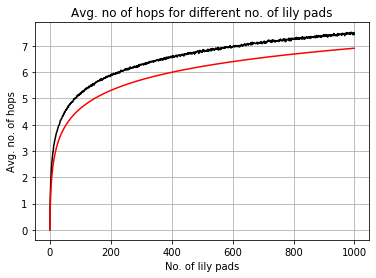

     No. of lily pads  Avg. no. of hops  Predicted
0                   0            0.0000   0.000000
1                   1            1.0000   0.693147
2                   2            1.4991   1.098612
3                   3            1.8218   1.386294
4                   4            2.0840   1.609438
5                   5            2.2724   1.791759
6                   6            2.4424   1.945910
7                   7            2.5956   2.079442
8                   8            2.7184   2.197225
9                   9            2.8434   2.302585
10                 10            2.9309   2.397895
11                 11            2.9925   2.484907
12                 12            3.1093   2.564949
13                 13            3.2041   2.639057
14                 14            3.2605   2.708050
15                 15            3.3197   2.772589
16                 16            3.3956   2.833213
17                 17            3.4512   2.890372
18                 18          

In [57]:
# v.4.0

# Libraries
from random import randint
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import math

def simulate_frog(n, simulations):
    nu_of_hops = []
    for i in range(0, simulations):
        # Init vars
        path = [0] # starting lily pad (lp) is 0

        def hop(starting_lp = 0):
            if path[-1] != n:
                next_lp = randint(starting_lp+1, n)
                path.append(next_lp)
                hop(path[-1])
            # print(path) check path is sensible      
        hop()
        nu_of_hops.append(len(path)-1) #-1 because we exclude the starting point from path
    return(mean(nu_of_hops))   


########
# MAIN #
########

# Init variables
sim_results = []
sim_predictions = []

# Set max number of lilypads
max_no_of_lilypads = 1000

# Run simulation for 1 lilypad until max_no_of_lilypads, each "simulations" times
for i in range(0, max_no_of_lilypads):
    sim_results.append(simulate_frog(i, simulations = 10000))

# Predict expected average no. of hops using log function
#sim_predictions = [0]
sim_predictions = [math.log(number+1) for number in range(0, max_no_of_lilypads) ]

#### Plot and summarise results
    
# plot histogram of simulated hops
plt.plot(sim_results, color = "black")
plt.plot(sim_predictions, color = "red")
plt.title("Avg. no of hops for different no. of lily pads")
plt.xlabel('No. of lily pads')
plt.ylabel('Avg. no. of hops')
plt.grid(True)
plt.show()

# print summary in a table (using Pandas dataframe)
sim_result_table = pd.DataFrame(
    {'No. of lily pads': range(0, max_no_of_lilypads),
     'Avg. no. of hops': sim_results,
     'Predicted': sim_predictions})
print(sim_result_table)